<a href="https://colab.research.google.com/github/zrEsteban/UST/blob/main/PautaS1_P3_2024S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problema 3 **(20p)** Una bomba con $70\%$ de rendimiento transporta $150 gpm$ de agua a 20°C desde un estanque a otro, según la Fig.3. Las tuberías son de hierro galvanizado $\left( \varepsilon = 0.0005\;in \right)$ de $2\;in$ de diámetro interno y tienen una longitud total de $60\;ft$.

a)   Encuentre la potencia suministrada a la bomba en HP, si se consideran como pérdidas menores: $K_{\text{contracción}}=1.0$; $K_{\text{codo 90}^\circ}= 0.41$; $K_{\text{expansión brusca}}= 1.0$

b)   ¿Cuál será la potencia suministrada a la bomba en HP, si se reemplaza la expansión brusca a la salida de la tubería por la expansión cónica 6° con $K = 0.3$?

Propiedades del agua:
$\left( \rho_{agua}= 1.94\;\frac{slug}{ft^3}; \nu_{agua} = 1.08\times10^{-5}\;\frac{ft^2}{s}; \gamma_{agua} = 62.4\;\frac{lb_f}{ft^3}\right)$

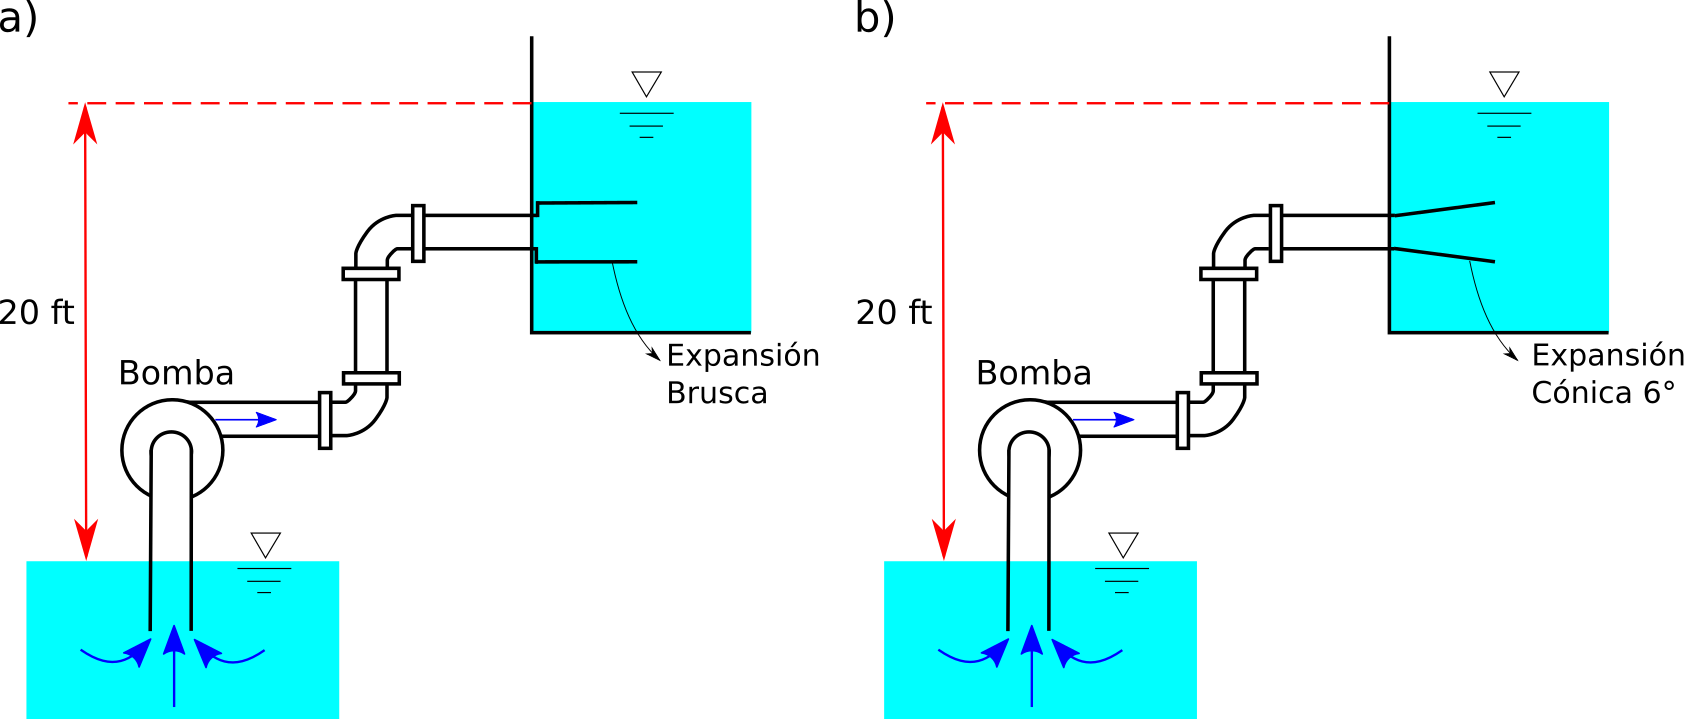

In [57]:
# @title
from IPython.display import Image
filepath='/content/drive/MyDrive/UST/Elementos de Mecánica/Modulos1y2/Solemne/P3.png'
Image(filename=filepath, width=500)

###(2.0p) Supuestos de trabajo:
- Estado Estacionario
- Fluido incompresible
- Flujo unidimensional
- Prop. homogéneas

###(1.0) Obtener el caudal y velocidad promedio dentro del ducto:
$Q = 150gpm = 150\cdot\frac{0.16}{60} = 0.4\frac{ft^3}{s}$ \\
$D = 2in =  \frac{2}{12}ft$ \\
$A = \frac{\pi D^2}{4} $ \\
$V = \frac{Q}{A} = 18.33\frac{ft}{s} $

In [ ]:
# @title
import numpy as np

Q = 150 * 0.16/60
print("Caudal:",round(Q,4),"ft3/s")

D = 2/12
A = np.pi*D**2/4.0
V = Q/A
print("Velocidad promedio dentro del sistema:",round(V,2),"ft/s")

###(1.0) Obtener el número de Rynolds:
$Re = \frac{VD}{\nu} ≈ 2.8\times10^{5}$

In [ ]:
# @title
nu = 1.08*10**(-5)
Re = V*D/nu
print("Numero de Rynolds",round(Re,0))

###(1.0) Obtener rugosidad relativa:
$\varepsilon_{r}=\frac{\varepsilon}{D} = 0.00025 = 2.5\times10^{-4} $

In [ ]:
# @title
eps = 0.0005
epsr = eps/(D*12)
print("Rugosidad relativa:",epsr)

###(1.0) Obtener factor de fricción (Diagrama de moody):
$f =  0.0168$

In [ ]:
# @title
#!pip install colebrook
import colebrook

f = colebrook.sjFriction(Re, epsr)
print("Factor de Fricción:",f)

###(2.0) Conservación de energía:
$P_{1} = P_{2} \implies \Delta P = 0$ \\
$v_{1} = v_{2} = 0$ \\
$\Delta z = 20$

$h_{b} = \Delta z + h_{l}$

###(1.0) Pérdidas de carga del sistema:
$h_{l} = \left(f\frac{L}{D} + \sum K \right)\frac{V^2}{2g}$

###(2.0) Pérdidas de carga para el sistema a):
$\sum K = K_{Cont} + 2K_{codo} + K_{Exp. Brusca} = 2.82$ \\
$h_{l} = 46.29 ft$


In [ ]:
# @title
g = 32.2
gamma = 62.4
L = 60

K1 = 1
K2 = 0.41
K3a = 1

Ka = K1 + 2*K2 + K3a
#print(Ka)

hl = (f*L/D + Ka)*(V**2/(2*g))
print("Perdidas de carga del sistema a):",round(hl,2),"ft")

dz = 20

hb = dz + hl
print("Altura neta de la bomba a):",round(hb,2),"ft")

Ph = gamma*Q*hb
print("Potencia hidráulica a):",round(Ph,2),"lb ft/s")


###(1.0) Altura neta de la bomba sistema a):

$h_{b}  = 20 + 46.29 = 66.29 ft$

###(1.0) Potencia hidráulica sistema a):
$P_{h} = \rho g h_{b} = 62.4\cdotp 0.4\cdotp66.29 = 1654.6\frac{lb_{f}-ft}{s}$

###(2.0) Rendimiento del sistema a):
$\eta = \frac{P_{h}}{P_{req}}\implies P_{req} = \frac{P_h}{\eta}= \frac{1654.6}{0.7} = 2363.7 \frac{lb_{f}-ft}{s}$ \\
$P_{h} = \frac{2363.7}{550}=4.3\;\text{HP}$

In [ ]:
# @title
Preq = Ph/0.7
print("Potencia hidráulica requerida:",round(Preq/550,2),"HP")

###(5.0p) Analizar sistema b):
$\sum K = K_{Cont} + 2K_{codo} + K_{Exp. Conica} = 2.12$ \\
$h_{l} = 42.64 ft$
$h_{b}  = 20 + 42.64 = 62.64 ft$
$P_{h} = \rho g h_{b} = 62.4\cdotp 0.4\cdotp62.64 = 1563.4\frac{lb_{f}-ft}{s}$
$\eta = \frac{P_{h}}{P_{req}}\implies P_{req} = \frac{P_h}{\eta}= \frac{1563.4}{0.7} = 2233.4 \frac{lb_{f}-ft}{s}$ \\
$P_{h} = \frac{2363.7}{550}=4.1\;\text{HP}$


In [ ]:
# @title
K3b = 0.3
Ka = K1 + 2*K2 + K3b

print(round(Ka,2))

hl = (f*L/D + Ka)*(V**2/(2*g))
print("Perdidas de carga del sistema a):",round(hl,2),"ft")

dz = 20

hb = dz + hl
print("Altura neta de la bomba a):",round(hb,2),"ft")

Ph = gamma*Q*hb
print("Potencia hidráulica a):",round(Ph,2),"lb ft/s")

Preq = Ph/0.7
print("Potencia hidráulica requerida:",round(Preq,2),"lb ft/s")
print("Potencia hidráulica requerida:",round(Preq/550,2),"HP")

var = (4.3-4.1)/4.3*100
print(round(var,2),"%")
